In [1]:
import pennylane as qml
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer
from pennylane import numpy as np
import math

import matplotlib.pyplot as plt
from scipy.integrate import quad
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping
import tensorflow as tf

2024-03-22 11:37:37.056247: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-22 11:37:37.229440: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-22 11:37:38.097319: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kban/MG5_aMC/ExRootAnalysis:/SATA_SSD/kban/HEPTools/MG5_aMC_v3_4_1/HEPTools/lhapdf6_py3/lib:/SATA_SSD/kban/HEPTools/root../root_build/lib:/SATA_SSD/kban/HEPTools/root/include:/SATA_SSD/kban/HEPTools

In [2]:
E0 = 0
Gamma = 2.5

In [3]:
def breit_wigner(E, E0, Gamma):
    """
    Calculates the value of the Breit-Wigner distribution for a given energy.

    Parameters:
    - E: The energy at which to evaluate the distribution.
    - E0: The resonance energy, or the peak position of the distribution.
    - Gamma: The width of the resonance.

    Returns:
    - The value of the Breit-Wigner distribution at energy E.
    """
    return 1 / ((E - E0)**2 + (Gamma / 2)**2)


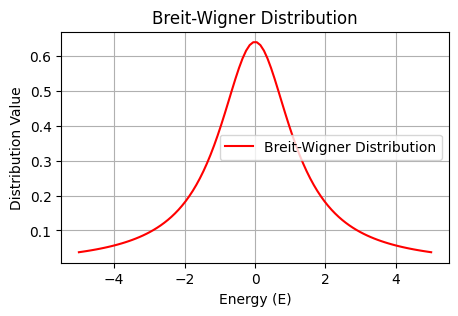

In [4]:
E_values_plot = np.linspace(-5, 5, 100)
BW_values = [breit_wigner(E, E0, Gamma) for E in E_values_plot]

# 분포 플롯
plt.figure(figsize=(5, 3))
plt.plot(E_values_plot, BW_values, label='Breit-Wigner Distribution', color='red')
plt.xlabel('Energy (E)')
plt.ylabel('Distribution Value')
plt.title('Breit-Wigner Distribution')
plt.legend()
plt.grid(True)
plt.show()


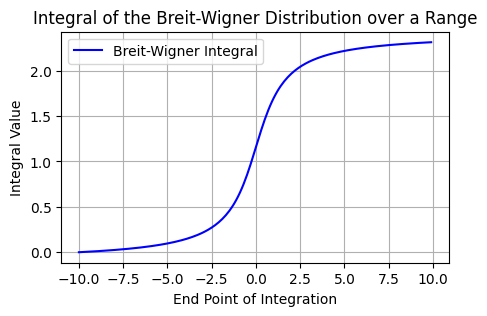

In [5]:
import matplotlib.pyplot as plt

# 특정 구간에서 브라이트위그너 함수의 적분값을 계산하는 함수
def integrate_breit_wigner(E0, Gamma, start, end):
    integral, _ = quad(breit_wigner, start, end, args=(E0, Gamma))
    return integral

# 계산할 구간 설정 (-10부터 10까지, 0.1 간격)
E_values = np.arange(-10, 10, 0.1)
integral_values = [integrate_breit_wigner(E0, Gamma, -10, E) for E in E_values]

# 결과 플롯
plt.figure(figsize=(5,3))
plt.plot(E_values, integral_values, label='Breit-Wigner Integral', color='blue')
plt.xlabel('End Point of Integration')
plt.ylabel('Integral Value')
plt.title('Integral of the Breit-Wigner Distribution over a Range')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
Ndata = 1000
E_values_plot = np.linspace(-5, 5, Ndata)
BW_values = [breit_wigner(E, E0, Gamma) for E in E_values_plot]


In [12]:
Xdata = np.array(E_values_plot).reshape(Ndata, 1)
ydata = np.array(BW_values)

In [13]:
### Preparing datas
train_data, val_data, train_target, val_target = train_test_split(Xdata, ydata, test_size=0.2, random_state=42)
train_target = train_target.reshape(-1)
val_target = val_target.reshape(-1)

In [14]:
# 모델 구축
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=1))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

optimizer = optimizers.Adam(learning_rate=0.001)
# 모델 컴파일
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

# 모델 구조 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


2024-03-22 11:38:02.809128: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-22 11:38:03.466601: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22822 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:3b:00.0, compute capability: 7.5


### Model Running

In [15]:
initial_predictions = model.predict(val_data)

7/7 [==============================] - 1s 1ms/step


Epoch 1/100
25/25 [==============================] - 0s 7ms/step - loss: 0.1093 - accuracy: 0.0000e+00 - val_loss: 0.0399 - val_accuracy: 0.0000e+00
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.0000e+00 - val_loss: 0.0229 - val_accuracy: 0.0000e+00
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.0000e+00 - val_loss: 0.0118 - val_accuracy: 0.0000e+00
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.0000e+00 - val_loss: 0.0077 - val_accuracy: 0.0000e+00
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.0000e+00 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.0000e+00 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.0000e+00 - v

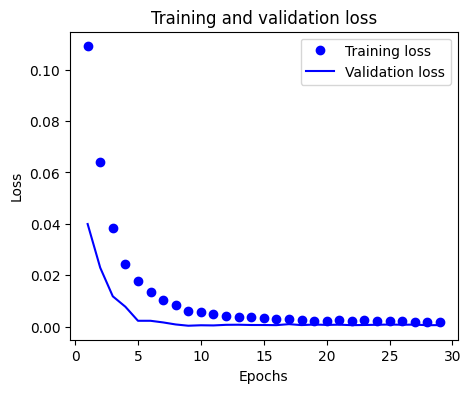

In [16]:
# callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=20)

history = model.fit(train_data, train_target, epochs=100, batch_size=32, validation_data = (val_data,val_target),
                            callbacks=[es]) #, callback])

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(1,1, figsize = (5,4))

plt.plot(epochs, loss, 'bo', label='Training loss')  # ‘bo’는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # ‘b’는 파란색 실선을 의미합니다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

-------------

4/4 [==============================] - 0s 1ms/step


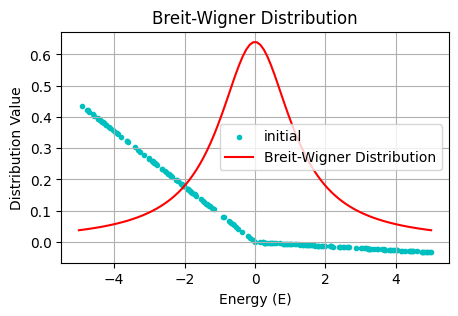

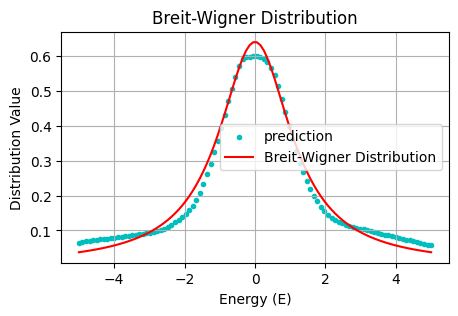

In [17]:
E_values_plot = np.linspace(-5, 5, 100)
BW_values = [breit_wigner(E, E0, Gamma) for E in E_values_plot]

Xtest = np.array(E_values_plot).reshape(100, 1)
ytest = np.array(BW_values)

pred_test = model.predict(Xtest)

# 분포 플롯
plt.figure(figsize=(5, 3))
plt.scatter(val_data, initial_predictions, label='initial', color='c', marker='.')
plt.plot(Xtest, ytest, label='Breit-Wigner Distribution', color='red')
plt.xlabel('Energy (E)')
plt.ylabel('Distribution Value')
plt.title('Breit-Wigner Distribution')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(5, 3))
plt.scatter(Xtest, pred_test, label='prediction', color='c', marker='.')
plt.plot(Xtest, ytest, label='Breit-Wigner Distribution', color='red')
plt.xlabel('Energy (E)')
plt.ylabel('Distribution Value')
plt.title('Breit-Wigner Distribution')
plt.legend()
plt.grid(True)
plt.show()
